<a href="https://colab.research.google.com/github/redjules/intermediate-statistics/blob/main/Intermediate_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Directory, Libraries and data

In [1]:
%cd /content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Intermediary Statistics

/content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Intermediary Statistics


In [2]:
#Libraries 
import pandas as pd
import scipy.stats as st
import math as m
import statsmodels.stats.api as sm

In [3]:
# Load Data
df = pd.read_csv("Wine-quality-challenge.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Normal Distribution

<Axes: ylabel='Density'>

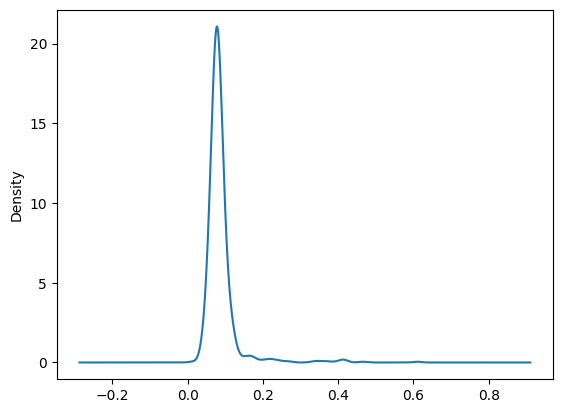

In [4]:
#Density plot of Chlorides
df.chlorides.plot.density()

In [14]:
#Check the #of observations within X standard deviations
df.loc[(df.chlorides <= df.chlorides.mean() + 3*df.chlorides.std()) & (df.chlorides >= df.chlorides.mean() - 3*df.chlorides.std())].chlorides.count()/df.chlorides.count()

0.9806128830519074

In [17]:
#find what is the share of observations withon 3 standard deviations of alcohol


<Axes: ylabel='Density'>

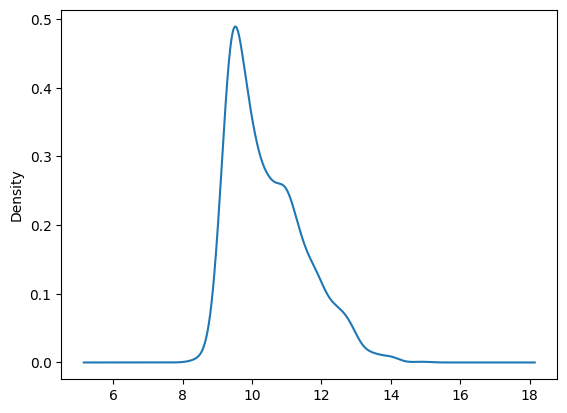

In [16]:
#plot añcohol distribution
df.alcohol.plot.density()

In [18]:
# check how many observations within 3 standard deviations
df.loc[(df.alcohol <= df.alcohol.mean() + 3*df.alcohol.std()) & (df.alcohol  >= df.alcohol.mean() - 3*df.alcohol.std())].alcohol.count()/df.alcohol.count()

0.9949968730456535

## Shapiro-Wilks Test

In [28]:
#Shapiro-Wilks for normality
stat, p = st.shapiro(df.chlorides)
print(p)
#condition
if p > 0.05:
  #if yes
  print('Sample looks Gaussian/Normal (fail to reject H0)')
  #if not
else:
  print('Sample does not look Gaussian/Normal (reject H0)')

0.0
Sample does not look Gaussian/Normal (reject H0)


In [27]:
#Shapiro Wils for Sulphates and create if else condition
stat, p = st.shapiro(df.chlorides)
print(p)
#condition
if p > 0.05:
  #if yes
  print('Sample looks Gaussian/Normal (fail to reject)')
  #if not
else:
  print('Sample does not look Gaussian/Normal (reject H0)')

0.0
Sample does not look Gaussian/Normal (reject H0)


## Standard Error

In [29]:
#using a function
st.sem(df.alcohol)

0.026650018979018173

In [30]:
#us doing the computations: standard deviations 
df.alcohol.std()/m.sqrt(df.alcohol.count())

0.026650018979018173

In [31]:
# Standard Error of pH
print(st.sem(df.pH))
df.pH.std() / m.sqrt(df.pH.count())

0.0038608683325203784


0.0038608683325203784

# Confidence interval

In [32]:
#Confidence interval of the mean of citric acid
print(df[['citric acid']].mean())
st.norm.interval(alpha = 0.95,
                 loc = df[['citric acid']].mean(),
                 scale = st.sem(df[['citric acid']]))


citric acid    0.270976
dtype: float64


<ipython-input-32-a8858ce05a66>:3: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  st.norm.interval(alpha = 0.95,


(array([0.26142755]), array([0.28052367]))

array([[<Axes: title={'center': 'citric acid'}>]], dtype=object)

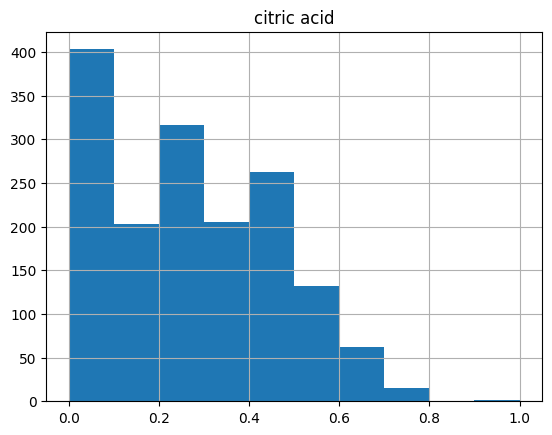

In [33]:
#Histogram
df[['citric acid']].hist()

In [36]:
#Confidence interval of the Density
st.norm.interval(confidence = 0.95,
                 loc = df.density.mean(),
                 scale = st.sem(df.density))

(0.9966541725972521, 0.9968391857517162)

<Axes: >

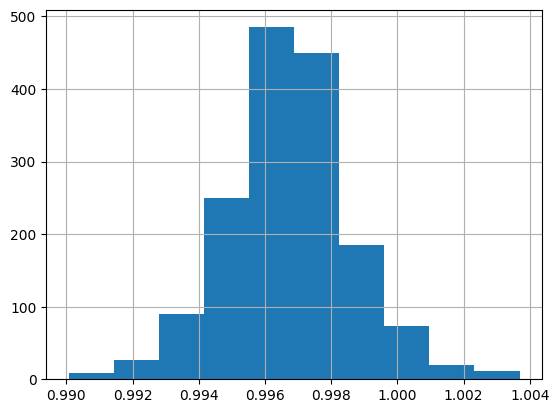

In [35]:
#Histogram of Density mean
df.density.hist()

## T-test

In [37]:
#load data
data = pd.read_csv("stackoverflow.csv")
data.head()

,Country,Salary,YearsCodedJob,OpenSource,Hobby,CompanySizeNumber,Remote,CareerSatisfaction,Data_scientist,Database_administrator,...,Developer_with_stats_math_background,DevOps,Embedded_developer,Graphic_designer,Graphics_programming,Machine_learning_specialist,Mobile_developer,Quality_assurance_engineer,Systems_administrator,Web_developer
0,United Kingdom,100000.000000,20,0,1,5000,Remote,8,0,0,...,0,0,1,0,0,0,0,0,0,0
1,United States,130000.000000,20,1,1,1000,Remote,9,0,0,...,0,1,1,0,0,0,0,1,0,1
2,United States,175000.000000,16,0,1,10000,Not remote,7,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Germany,64516.129030,4,0,0,1000,Not remote,9,0,0,...,0,0,0,0,0,0,0,0,0,1
4,India,6636.323594,1,0,1,5000,Not remote,5,0,0,...,0,0,0,0,0,0,0,0,0,1


In [39]:
# subset
salary_uk = data.loc[data.Country == "United Kingdom"].Salary
salary_de = data.loc[data.Country == "Germany"].Salary

In [41]:
# T-test
stat, p = st.ttest_ind(a = salary_uk, b = salary_de)
print(p)
if p > 0.05:
  print('Both countries have similar salaries (fail to reject H0)')
else:
  print('There is a difference in salaries (reject H0)')

0.026389999555203502
There is a difference in salaries (reject H0)


In [42]:
# T-test in experience between India and United States
us_experience = data.loc[data.Country == 'United States'].YearsCodedJob
in_experience = data.loc[data.Country == 'India'].YearsCodedJob
stat, p = st.ttest_ind(a= us_experience, b= in_experience)
print(p)
if p > 0.05:
  print('Groups are similar (fail to reject H0)')
else:
  print('Groups are different (reject H0)')


5.225676347614714e-58
Groups are different (reject H0)


<Axes: >

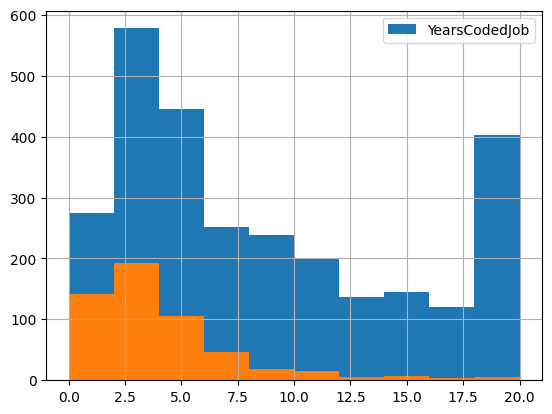

In [44]:
#Histograms
us_experience.hist(legend=True)
in_experience.hist()

## Chi-square test

In [45]:
#cross tabulation
tab = pd.crosstab(index = data.Country,
                  columns = data.Remote)
tab

Remote,Not remote,Remote
Country,,
Canada,457,28
Germany,717,40
India,482,56
United Kingdom,953,70
United States,2410,381


In [49]:
#chi-square test
chi2, p, dof, exp = st.chi2_contingency(tab)
print(p)
if p > 0.05:
  print('there is no relationship (fail(to reject H0)')
else:
  print('there is a strong relationship (reject H0)')

3.321120877301216e-16
there is a strong relationship (reject H0)


In [51]:
# Chi square test between company size and hobbies
tab2 = pd.crosstab(index = data.Hobby,
                  
                  columns = data.CompanySizeNumber)

chi2, p, dof, exp = st.chi2_contingency(tab2)
print(p)
if p > 0.05:
  print('There is no relationship (fail to reject H0)')
else:
  print('There is a strong relationship (reject H0)')

0.025708455559671013
There is a strong relationship (reject H0)
